In [ ]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
scipy: 1.13.1
numpy: 1.26.4
matplotlib: 3.7.1
pandas: 2.2.2
sklearn: 1.5.2


In [ ]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# Step 2: Load the Dataset
from google.colab import files
import pandas as pd # Import the pandas library as pd

uploaded = files.upload()

dataset = pd.read_csv("iris.csv", header=None)  # Read the uploaded file, assuming its name is 'iris (1).csv'
# Assign column names
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset.columns = names
dataset.head()


Saving iris.csv to iris (1).csv


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# shape
print(dataset.shape)

(150, 5)


In [ ]:

# head
print(dataset.head(5))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [ ]:
# summarize the data
from pandas import read_csv
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
# shape
print(dataset.shape)
# head
print(dataset.head(5))
# descriptions
print(dataset.describe())
# class distribution
print(dataset.groupby('class').size())

(150, 5)
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
class
Iris-setosa        50
Iris-vers

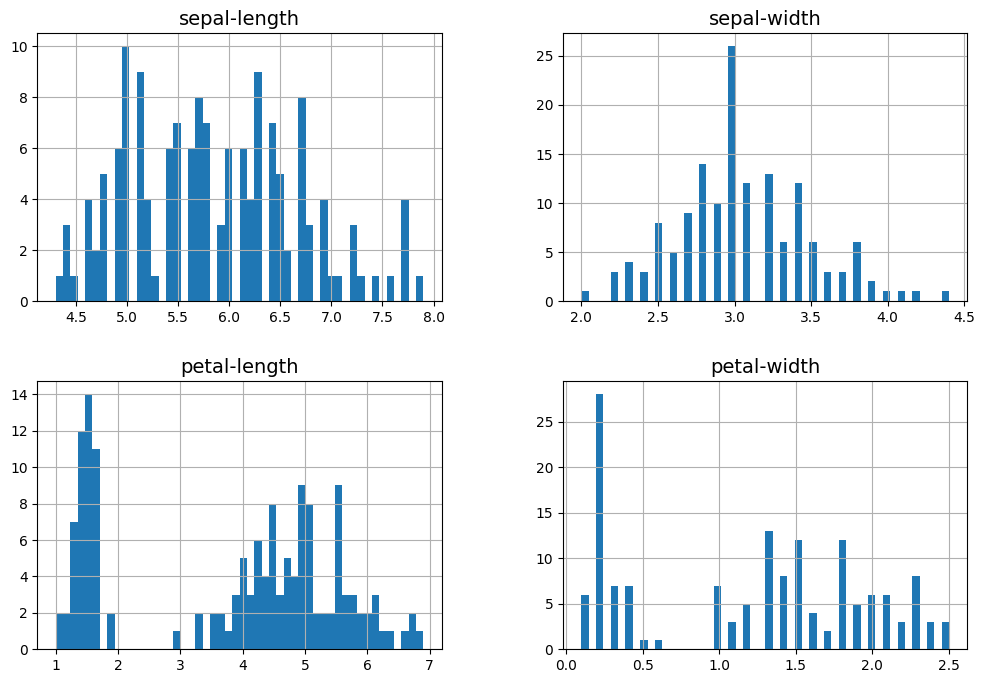

In [ ]:
#Data Visualization

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()


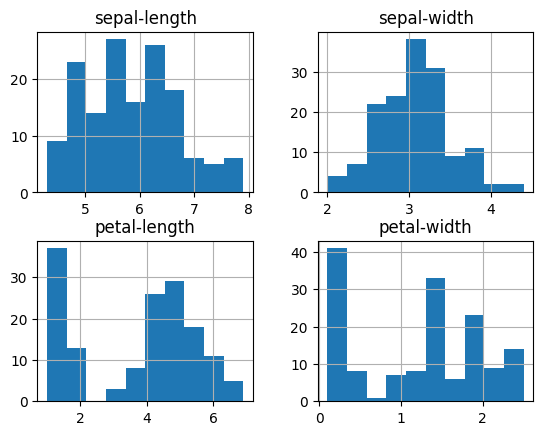

In [ ]:
# histograms
dataset.hist()
plt.show()

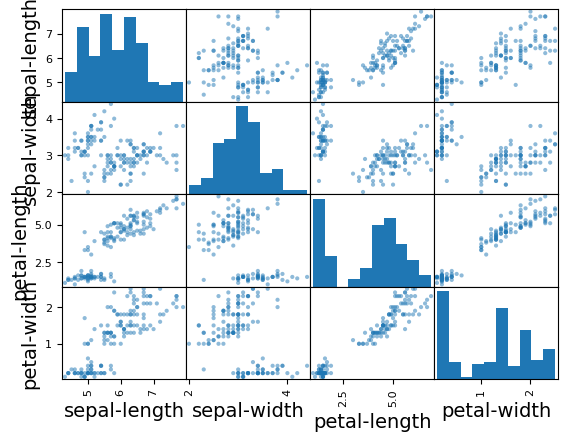

In [ ]:

# scatter plot matrix
scatter_matrix(dataset)
plt.show()

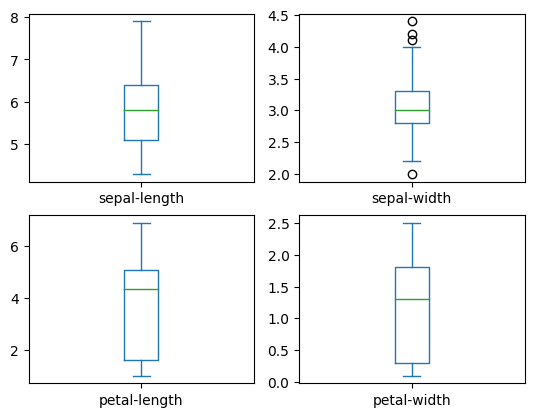

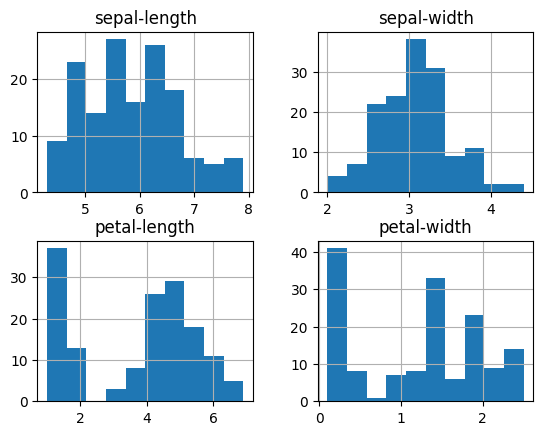

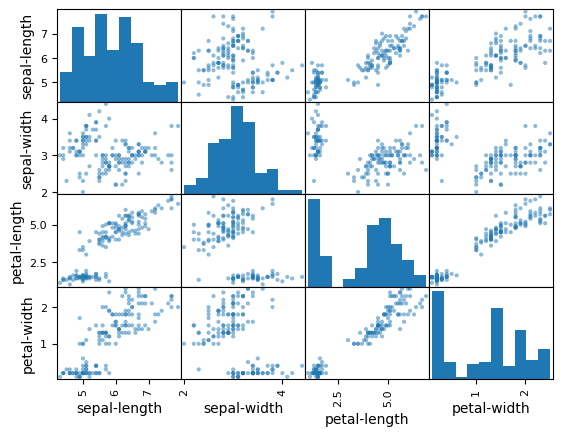

In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()
# histograms
dataset.hist()
plt.show()
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

Create a Test Set

In [62]:
#splitting into dependent and independent variables
from sklearn.model_selection import train_test_split # import the missing function

array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) # use proper variable names

In [63]:
# Multinomial Naive Bayes
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score # import necessary functions

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

results = {} # Initialize results as an empty dictionary

results['MultinomialNB'] = {
    'Accuracy': accuracy_score(y_test, y_pred_mnb),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_mnb),
    'Precision': precision_score(y_test, y_pred_mnb, average='macro'),
    'Recall': recall_score(y_test, y_pred_mnb, average='macro')
}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [64]:
# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

results['BernoulliNB'] = {
    'Accuracy': accuracy_score(y_test, y_pred_bnb),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_bnb),
    'Precision': precision_score(y_test, y_pred_bnb, average='macro'),
    'Recall': recall_score(y_test, y_pred_bnb, average='macro')
}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

results['GaussianNB'] = {
    'Accuracy': accuracy_score(y_test, y_pred_gnb),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_gnb),
    'Precision': precision_score(y_test, y_pred_gnb, average='macro'),
    'Recall': recall_score(y_test, y_pred_gnb, average='macro')
}


In [71]:
# Complement Naive Bayes
cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)

results['ComplementNB'] = {
    'Accuracy': accuracy_score(y_test, y_pred_cnb),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_cnb),
    'Precision': precision_score(y_test, y_pred_cnb, average='macro'),
    'Recall': recall_score(y_test, y_pred_cnb, average='macro')
}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
# Display the results in a DataFrame for easy comparison
df_results = pd.DataFrame(results).T
df_results['Confusion Matrix'] = df_results['Confusion Matrix'].apply(lambda x: x.tolist())
df_results

,Accuracy,Confusion Matrix,Precision,Recall
MultinomialNB,0.566667,"[[11, 0, 0], [0, 0, 13], [0, 0, 6]]",0.438596,0.666667
BernoulliNB,0.2,"[[0, 0, 11], [0, 0, 13], [0, 0, 6]]",0.066667,0.333333
GaussianNB,0.966667,"[[11, 0, 0], [0, 12, 1], [0, 0, 6]]",0.952381,0.974359
ComplementNB,0.566667,"[[11, 0, 0], [1, 0, 12], [0, 0, 6]]",0.416667,0.666667


By using K fold:

In [59]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import load_iris
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, ComplementNB
import pandas as pd # Import pandas

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define the k-fold cross-validation configuration
kfold = KFold(n_splits=10, random_state=1, shuffle=True)

# Define the models
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'ComplementNB': ComplementNB()
}

# Store results in a dictionary for easy DataFrame creation
all_results = {}

# Evaluate each model using cross-validation
for model_name, model in models.items():
    results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    print(f"{model_name} Accuracy Scores: {results}")
    print(f"{model_name} Mean Accuracy: {results.mean():.4f} ± {results.std():.4f}\n")

    # Store results in the dictionary
    all_results[model_name] = results

# Create the DataFrame using the collected results
df_results = pd.DataFrame(all_results)  # Use model names as columns
# Transpose DataFrame to have models as index
df_results = df_results.T
df_results.columns = [f"Fold {i+1}" for i in range(kfold.n_splits)] # Rename columns to represent folds
#Calculate and Add a 'Mean Accuracy' column
df_results['Mean Accuracy'] = df_results.mean(axis=1)
df_results

GaussianNB Accuracy Scores: [1.         0.93333333 0.93333333 1.         1.         1.
 0.93333333 0.86666667 1.         0.86666667]
GaussianNB Mean Accuracy: 0.9533 ± 0.0521

MultinomialNB Accuracy Scores: [1.         0.6        1.         0.73333333 0.73333333 0.93333333
 1.         0.93333333 0.6        0.73333333]
MultinomialNB Mean Accuracy: 0.8267 ± 0.1555

BernoulliNB Accuracy Scores: [0.26666667 0.13333333 0.2        0.2        0.2        0.26666667
 0.2        0.13333333 0.06666667 0.2       ]
BernoulliNB Mean Accuracy: 0.1867 ± 0.0581

ComplementNB Accuracy Scores: [0.6        0.53333333 0.66666667 0.8        0.8        0.73333333
 0.53333333 0.86666667 0.53333333 0.6       ]
ComplementNB Mean Accuracy: 0.6667 ± 0.1193



,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10,Mean Accuracy
GaussianNB,1.000000,0.933333,0.933333,1.000000,1.000000,1.000000,0.933333,0.866667,1.000000,0.866667,0.953333
MultinomialNB,1.000000,0.600000,1.000000,0.733333,0.733333,0.933333,1.000000,0.933333,0.600000,0.733333,0.826667
BernoulliNB,0.266667,0.133333,0.200000,0.200000,0.200000,0.266667,0.200000,0.133333,0.066667,0.200000,0.186667
ComplementNB,0.600000,0.533333,0.666667,0.800000,0.800000,0.733333,0.533333,0.866667,0.533333,0.600000,0.666667
